Simple Linear Regression Problem with 2 variables - 
Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the cvs dataset using pandas
dataset = pd.read_csv("./data/student_scores.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Returns number of rows and columns of dataset
dataset.shape

(25, 2)

In [6]:
# Print statistical details of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


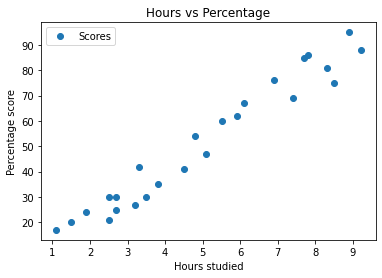

In [8]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

# there is a positive linear relation between the number of hours studied and percentage of score.
# In a positive linear relationship, the increase in the independent variable also increases the levels of the dependent 
# variable. In a negative linear relationship, as the independent variable increases or decreases, 
# the dependent variable moves in the opposite way.

In [9]:
# Extract attributes and labels
# X = attributes. Specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores"
X = dataset.iloc[:,:-1].values 

# y = labels. Specified "1" for the label column since the index for "Scores" column is 1. 
y = dataset.iloc[:, 1].values

In [11]:
# Split this data into training and test sets
from sklearn.model_selection import train_test_split
# test_size variable is where we specify the proportion of test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Training the algorithm
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Instantiate it
regressor = LinearRegression()

# Call the fit() method along with our training data.
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Retrieve the intercept
print(regressor.intercept_)

# Retrieve the slope
print(regressor.coef_)

2.0181600414346974
[9.91065648]


In [15]:
# Making predictions
# y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
y_pred = regressor.predict(X_test)

In [16]:
# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Evaluate the algorithm

from sklearn import metrics

# For regression algorithms, three evaluation metrics are commonly used
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error (MSE) is the mean of the squared errors 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
